# **Titanic Dataset Analysis**

This project is devided into 2 sections:
1. Data Analysis(visualizing the data, finding factors of survival and...)
2. Binary Classification(survived/not survived)

*note: This dataset is available on Kaggle:*
https://www.kaggle.com/datasets/yasserh/titanic-dataset

# Data Analysis

In [2]:
# import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [3]:
# import the dataset
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.shape

(891, 12)

In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# handle null and unimportant values
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df['Age'] = df['Age'].bfill() # fillna(int(df['Age'].mean()))
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [8]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

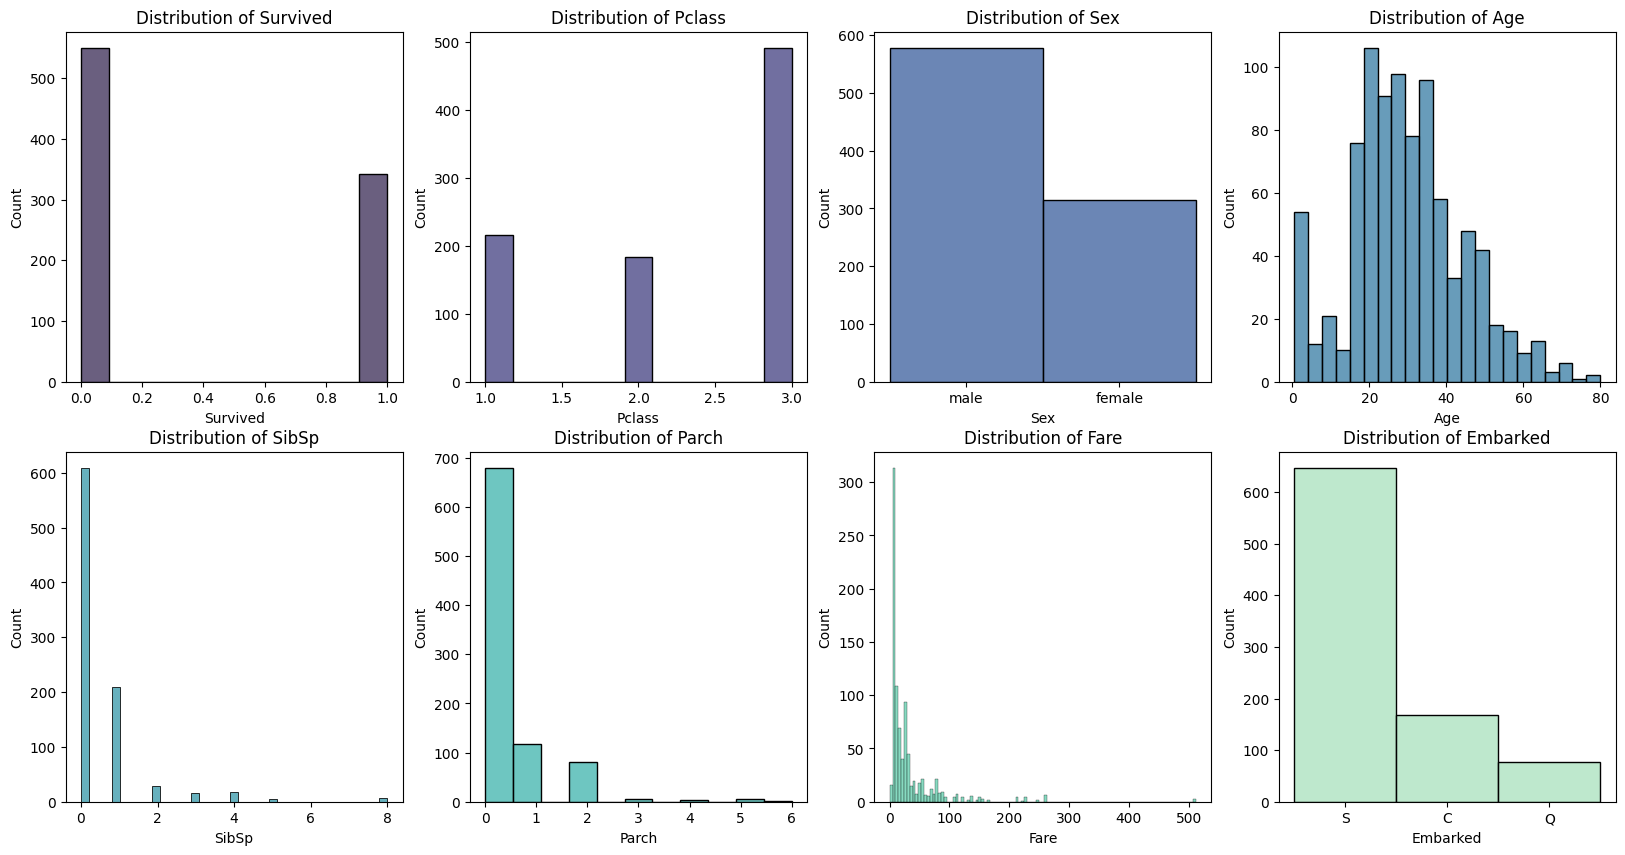

In [9]:
# plot distributions
palette = sns.color_palette('mako', n_colors=9)

plt.figure(figsize=(20, 10))
for i, col in enumerate(df.columns, start=1):
    plt.subplot(2, 4, i)
    sns.histplot(data=df, x=col, color=palette[i])
    plt.title(f'Distribution of {col}')

In [10]:
# mapping
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 1, 'C': 2, 'Q': 3})

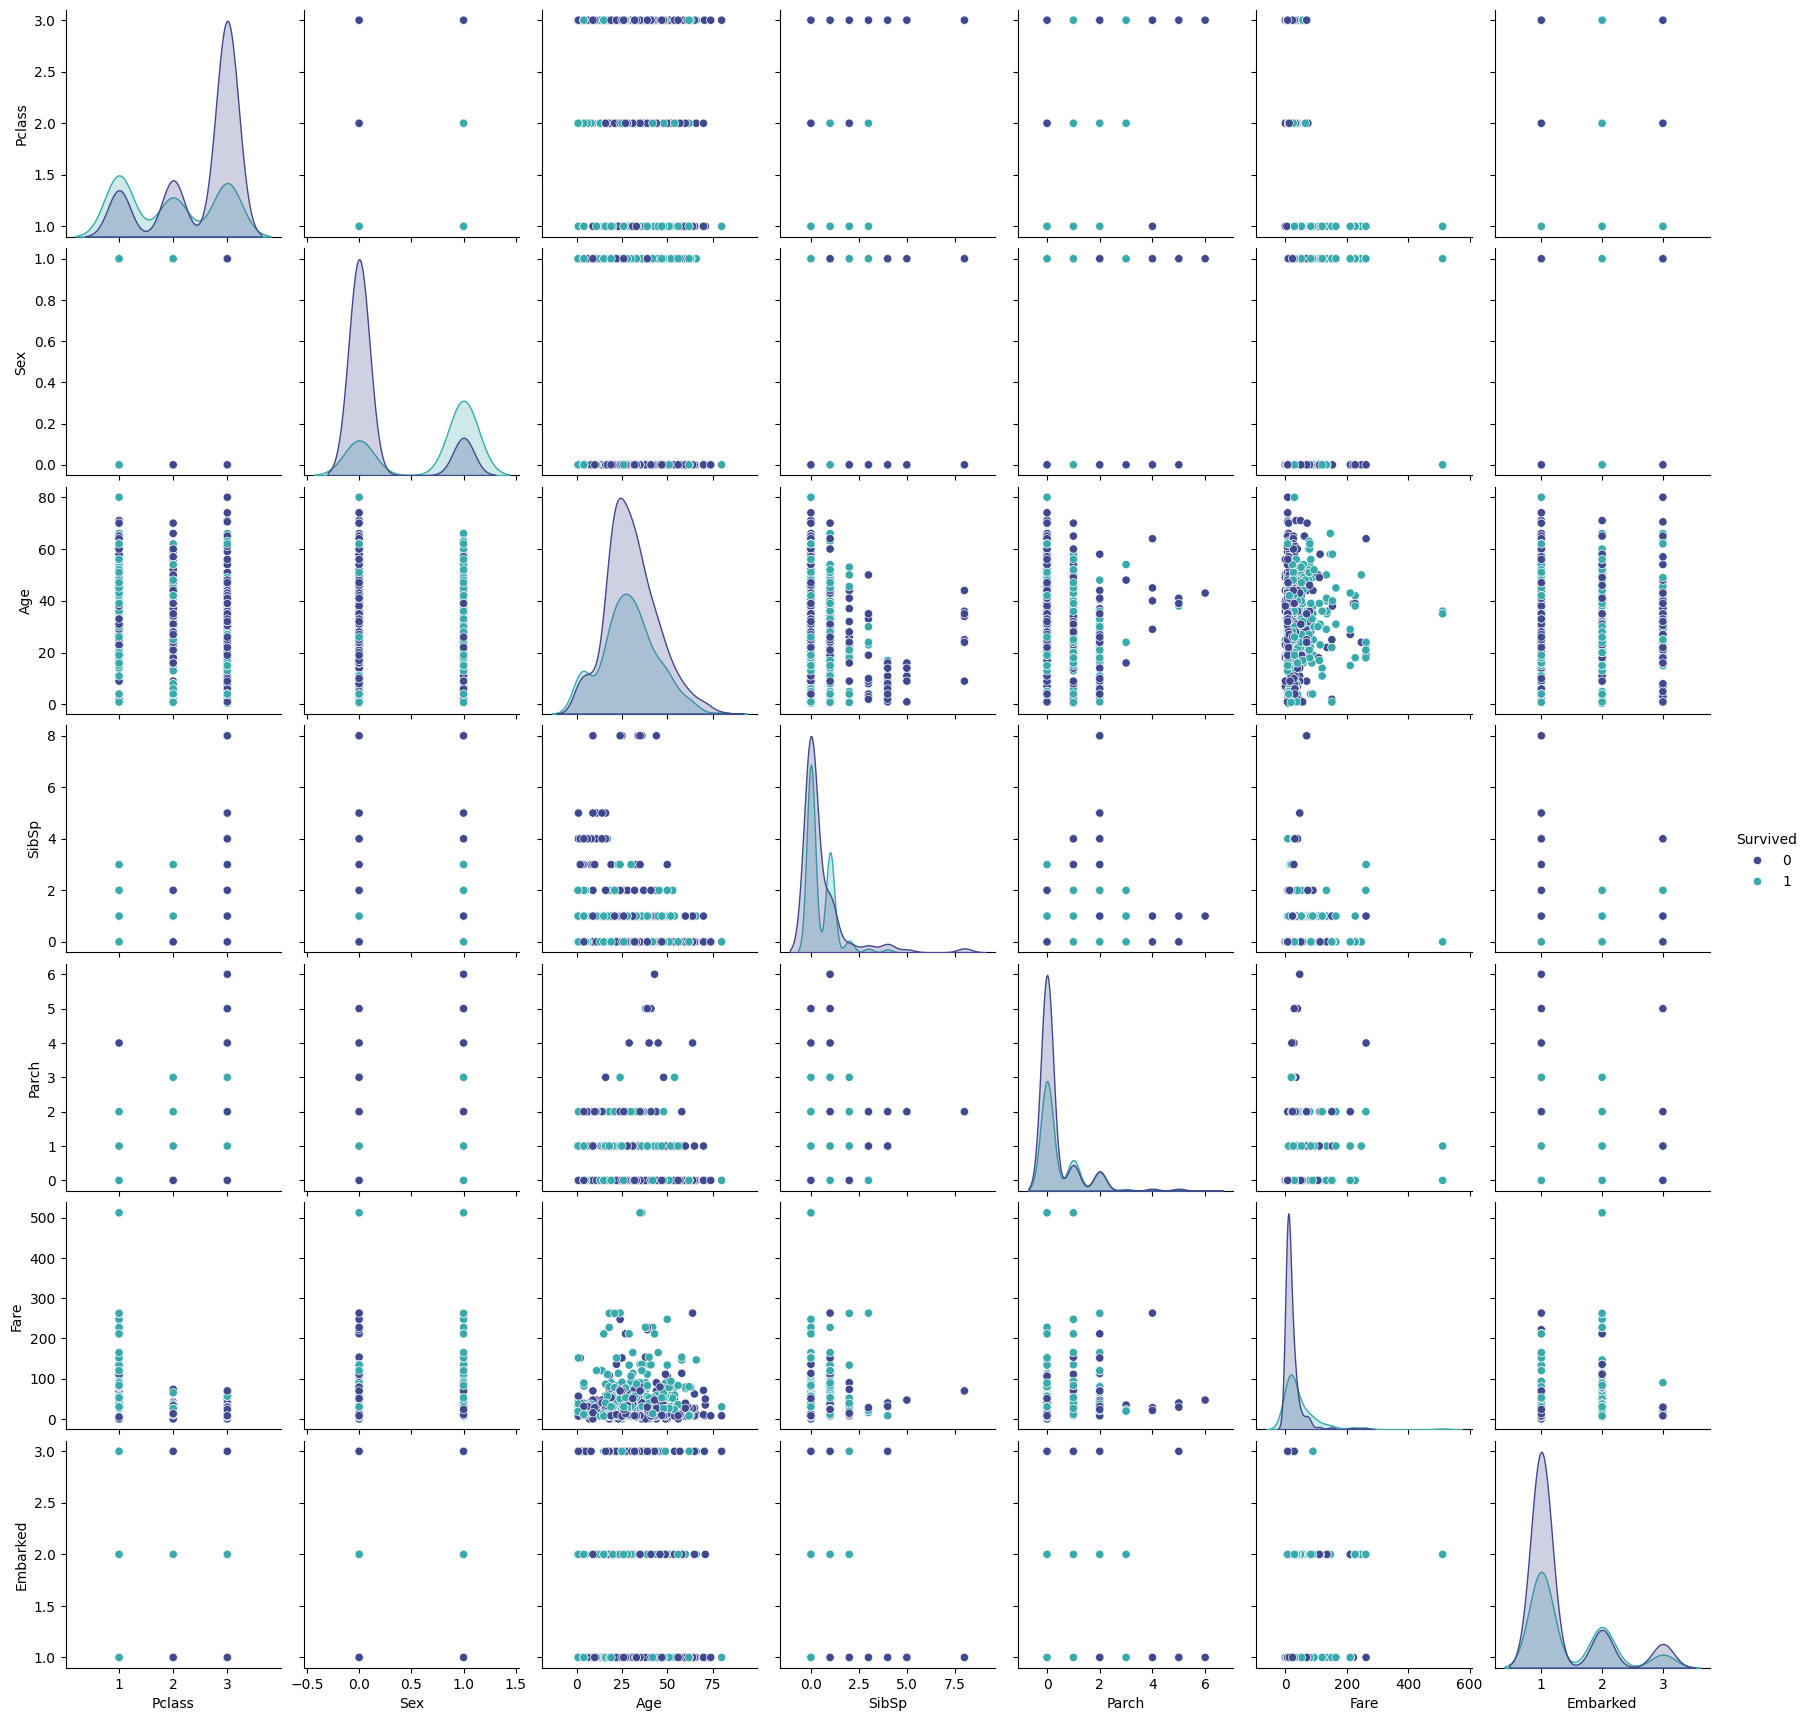

In [11]:
# pairplot
sns.pairplot(df, hue='Survived', palette=sns.color_palette('mako', n_colors=2))

<Axes: >

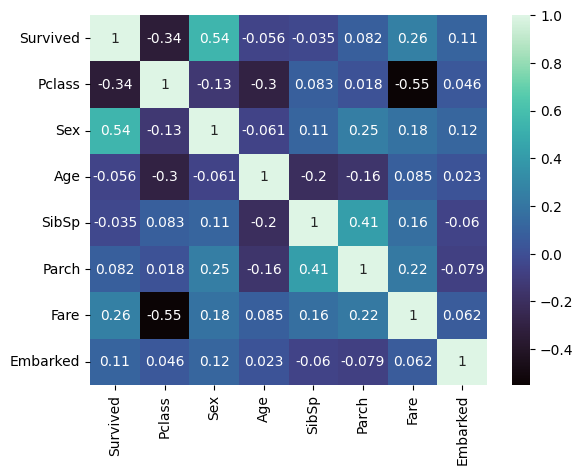

In [12]:
# correlation
sns.heatmap(df.corr(), annot=True, cmap=sns.color_palette('mako', as_cmap=True))

Text(0.5, 1.0, 'Survival Rate by Sex')

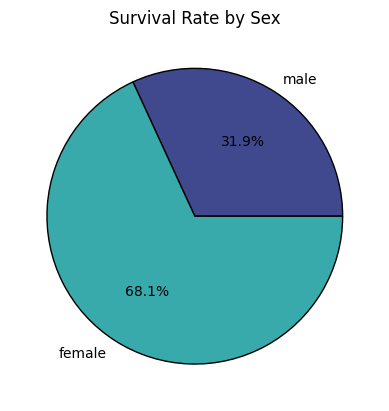

In [13]:
total_survivors = df[df['Survived'] == 1].shape[0]
female_survivors = df[(df['Sex'] == 1) & (df['Survived'] == 1)].shape[0]
male_survivors = df[(df['Sex'] == 0) & (df['Survived'] == 1)].shape[0]
female_percentage = (female_survivors / total_survivors) * 100
male_percentage = (male_survivors / total_survivors) * 100

plt.pie(
    [male_percentage, female_percentage],
    labels=['male', 'female'],
    autopct='%1.1f%%',
    wedgeprops={'edgecolor': 'black', 'linewidth': 1},
    colors=sns.color_palette('mako', n_colors=2)
)
plt.title('Survival Rate by Sex')

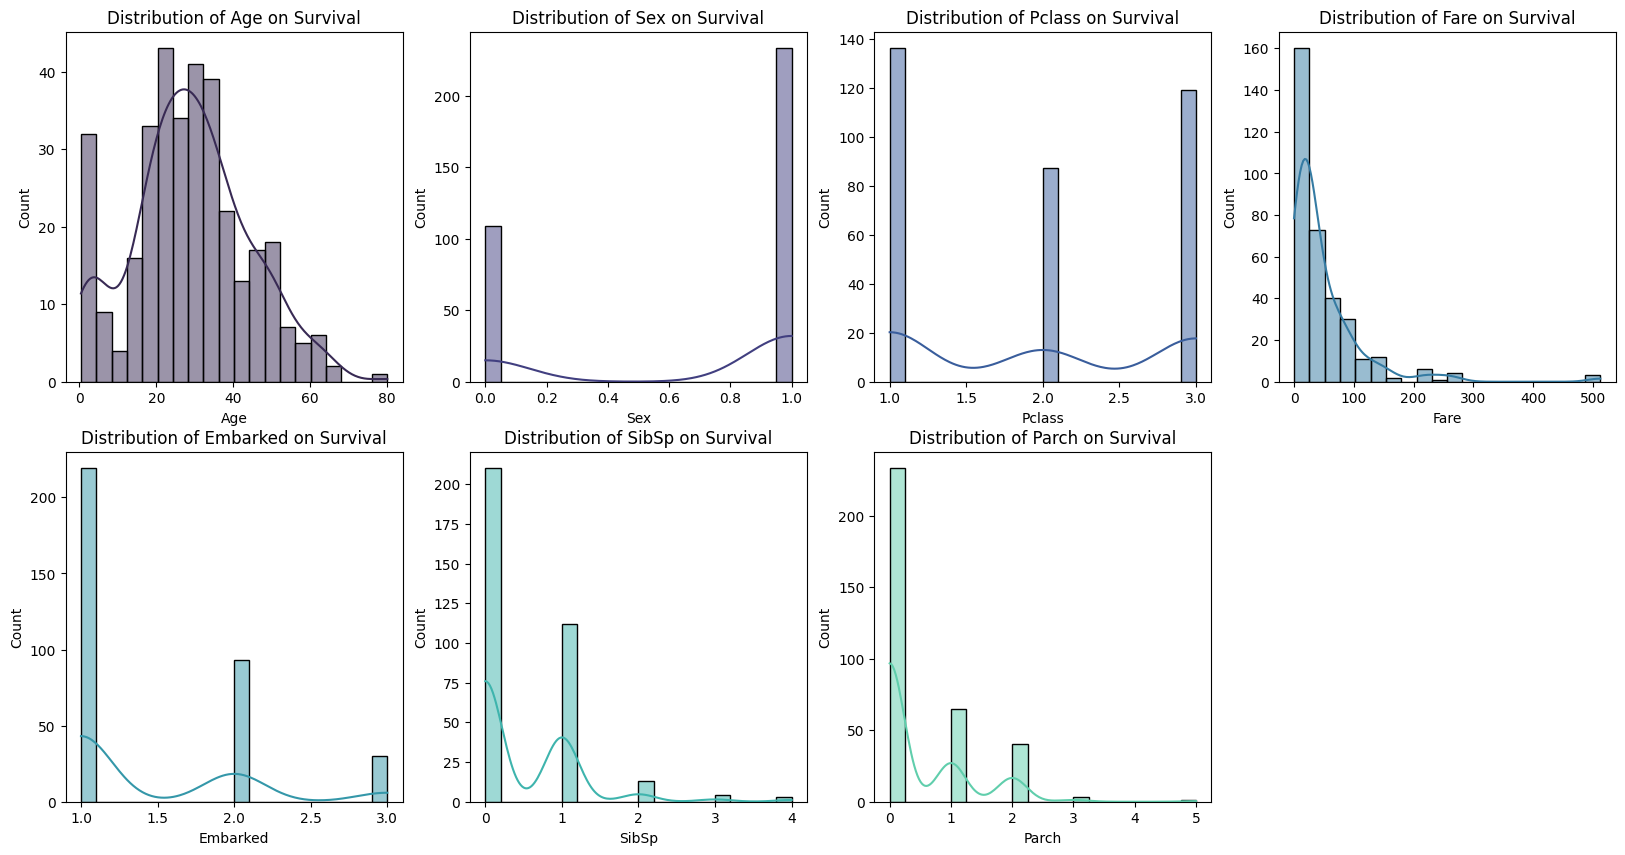

In [14]:
factors = ['Age', 'Sex', 'Pclass', 'Fare', 'Embarked', 'SibSp', 'Parch']
palette = sns.color_palette('mako', n_colors=9)

plt.figure(figsize=(20, 10))
for i, factor in enumerate(factors, start=1):
    plt.subplot(2, 4, i)
    plt.title(f'Distribution of {factor} on Survival')
    sns.histplot(
        data=df[df['Survived'] == 1],
        x=factor,
        bins=20,
        kde=True,
        color=palette[i]
    )

Conclusion:

In [15]:
"""
Based on the data:
    - More women have survived comparing to men.
    - Survivors are mostly young adults and children.
    - Survivors of A class are more than the other two classes.
    - Passengers with no parents or children have more survival rate.
    - Passengers with no sibilings or spouses have more survival rate.
    
""";